In [7]:
import multiprocessing
import threading
import random as r
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import time

In [8]:
#Number of Cores
numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

Num of cores are:  8


In [9]:
#function for multiplying two matrices
def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

# Function to perform matrix multiplications within a thread
def perform_matrix_multiplications(num_matrices, matrix_size, constant_matrix, results, results_lock):
    for _ in range(num_matrices):
        # Generate a random matrix
        random_matrix = np.random.rand(*matrix_size)
        
        # Perform matrix multiplication
        result = matrix_multiply(random_matrix, constant_matrix)
        
        # Append result to the shared results list using a lock
        with results_lock:
            results.append(result)

In [10]:
def main(num_threads):
    # Define matrix dimensions
    matrix_size = (1000, 1000)
    num_matrices = 500

    # Create random matrices and constant matrix
    constant_matrix = np.random.rand(*matrix_size)

    # List to hold results
    results = []
    results_lock = threading.Lock()  # Lock to safely append results

    # List to hold threads
    threads = []

    # Calculate number of matrices each thread will handle
    matrices_per_thread = num_matrices // num_threads
    remaining_matrices = num_matrices % num_threads

    # Start time measurement
    start_time = time.time()

    # Perform matrix multiplications with specified number of threads
    for _ in range(num_threads):
        # Determine number of matrices this thread will handle
        if remaining_matrices > 0:
            num_matrices_this_thread = matrices_per_thread + 1
            remaining_matrices -= 1
        else:
            num_matrices_this_thread = matrices_per_thread

        # Create and start a new thread
        thread = threading.Thread(
            target=perform_matrix_multiplications,
            args=(num_matrices_this_thread, matrix_size, constant_matrix, results, results_lock),
        )
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()  # join() method blocks the execution of the main program until the thread on which it is called completes it's execution

    # End time measurement
    end_time = time.time()

    # Calculate total time taken
    total_time = end_time - start_time

    print(f"Number of results: {len(results)}")
    print(f"Total time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time

In [11]:
# Testing for 8 threads
num_threads=[1,2,3,4,5,6,7,8]
time_taken=[]
for i in range(0,len(num_threads)):
    time_taken.append(main(num_threads[i]))

Number of results: 500
Total time taken with 1 threads: 30.7473 seconds
Number of results: 500
Total time taken with 2 threads: 20.9168 seconds
Number of results: 500
Total time taken with 3 threads: 17.7543 seconds
Number of results: 500
Total time taken with 4 threads: 18.4421 seconds
Number of results: 500
Total time taken with 5 threads: 18.2677 seconds
Number of results: 500
Total time taken with 6 threads: 18.8499 seconds
Number of results: 500
Total time taken with 7 threads: 17.7783 seconds
Number of results: 500
Total time taken with 8 threads: 18.9694 seconds


In [12]:
time_taken

[30.74725914001465,
 20.916796922683716,
 17.754257917404175,
 18.44210648536682,
 18.267725229263306,
 18.849947690963745,
 17.77833914756775,
 18.969404697418213]

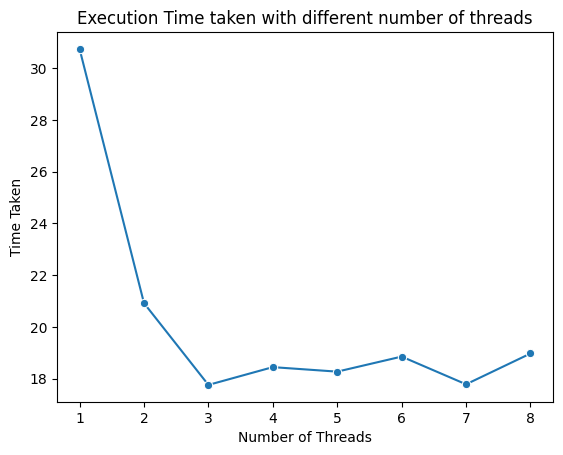

In [13]:
sns.lineplot(x=num_threads, y=time_taken, marker='o')
plt.title('Execution Time taken with different number of threads')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.show()